Let's start off with a definition for **discrete uniform distributions.**

Definition: A random variable X has a discrete uniform distribution if each of the n values in its range: x1,x2,x3....xn) has equal probability:
       i.e the probability of one happening = 1/n (n is the number of        possible events) eg every dice roll has equal odds if its a          fair dice i.e 1/6 probability of a number being rolled
    
        

Now let's use python to show a simple example!

First the imports:

In [1]:
# Import all the usual imports from the Python for Data Analysis and Visualization Course.
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline


Now let's set up a dice roll and plot the distribution using seaborn before we go use matplotlib by itself.

Text(0.5, 1.0, 'Probability Mass Function for Dice Roll')

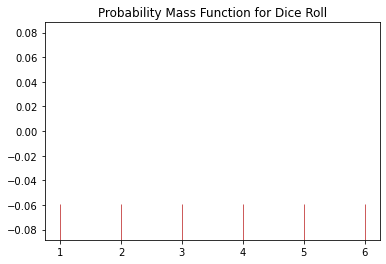

In [2]:
# How about a roll of a dice?

# Let's check out the Probability Mass function!

# Each number
roll_options = [1,2,3,4,5,6]

# Total probability space ie if all probabilities are summed, it should equal 1
tprob = 1

# Each roll has same odds of appearing (on a fair die at least)
prob_roll = tprob / len(roll_options) 

# Plot using seaborn rugplot (note this is not really a rugplot), setting height equal to probability of roll
uni_plot = sns.rugplot(roll_options,height=prob_roll,c='indianred')

# Set Title
uni_plot.set_title('Probability Mass Function for Dice Roll')


     

We can see in the above example that the f(x) value on the plot is just equal to 1/(Total Possible Outcomes)

So what's the mean and variance of this uniform distribution?

The mean is simply the max and min value divided by two, just like the mean of two numbers.
        mean = (b + a)/2

With a variance of:
        variance =((b-a+1)**2-1)/12
        b is max value
        a is min value
 
Now let's see how to automatically create a Discrete Uniform Distribution using Scipy.

In [5]:
# Imports
from scipy.stats import randint

#Set up a low and high boundary for dice roll ( go to 7 since index starts at 0)
low,high = 1,7

# Get mean and variance
mean,var = randint.stats(low,high)

print('The mean is %2.1f' %mean)


The mean is 3.5


<BarContainer object of 6 artists>

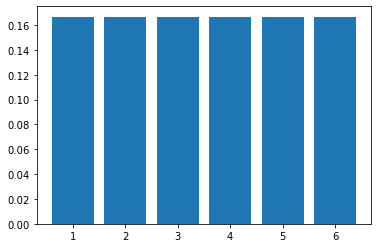

In [6]:
# Now we can make a simple bar plot
plt.bar(roll_options,randint.pmf(roll_options,low,high))##pmf takes 3 arguments


That's basically it for a discrete uniform distribution, check out the rest of the reading below if you're still interested.

Example of real world use: German Tank Problem
So now that we know some information about the uniform discrete distribution function, how about we use it to solve a problem?

In this case we'll solve the famous German Tank Problem.

For background, first read the wikipedia page: http://en.wikipedia.org/wiki/German_tank_problem

Excerpt from Wikipedia:
"In the statistical theory of estimation, the problem of estimating the maximum of a discrete uniform distribution from sampling without replacement is known in English as the German tank problem, due to its application in World War II to the estimation of the number of German tanks. Estimating the population maximum based on a single sample yields divergent results, while the estimation based on multiple samples is an instructive practical estimation question whose answer is simple but not obvious."

After reading the Wikipedia article, check out the following code for an example Python workout of the example problem.

Using a Minimum-variance unbiased estimator we obtain the population max is equal to :

    population max = sample max+(sample max/sample size)-1



If we for instance captured 5 tanks with the serial numbers 3,7,11,16 then we know the max observed serial number was m=16. This is our sample max with a sample size of 5 tanks. Plugging into the MVUE results in:

In [7]:
tank_estimate = 16 + (16/5) - 1
tank_estimate


18.2

In [8]:
## For a Bayseian Approach:


m=16
k=5
tank_b_estimate = (m-1)*( (k-1)/ ( k-2) )
tank_b_estimate


## Remember, this is still missing the STD

20.0

Let's learn about **Continous Uniform Distributions**. 

Note: You should look at Discrete Uniform Distributions first.
If we took a discrete uniform distribution to probability of any outcome was 1/n for any outcome. 

However for a continous distribution, our data can not be divided in discrete components, for example weighing an object. With perfect precision on weight, the data can take on any value between two points(e.g 5.4 grams,5.423 grams, 5.42322 grams, etc.)

This means that our n possible values from the discrete uniform distribution is going towards infinity, thus the probability of any individual outcome for a continous distribution is **1/∞** ,technically undefined or zero if we take the limit to infinity ie **the probability of the event occurring is infinite and not definite**. Thus we can only take probability measurements of ranges of values, and not just a specific point. Let's look at some definitions and examples to get a better understanding!

A continous random variable X with a probability density function is a continous uniform random variable when:
        
        f(x) = 1/(b-a)
        (a <= x <= b)
 
This makes sense, since for a discrete uniform distribution the f(x)=1/n but in the continous case we don't have a specific n possibilities, we have a range from the min (a) to the max (b)!

The mean is simply the average of the min and max:
        
        (a + b)/12

The variance is defined as:
        
        ((b-a)**2)/12
 


**Example of Continuous distribution:**

So what would an example problem look like? Let's say on average, a taxi ride in NYC takes 22 minutes. After taking some time measurements from experiments we gather that all the taxi rides are uniformly distributed between 19 and 27 minutes. What is the probability density function of a taxi ride, or f(x)?

In [9]:
#Let's solve this with python

#Lower bound time
a = 19

#Upper bound time
b = 27

#Then using our probability density function we get
fx = 1.0/(b-a)

#show 
print('The probability density function results in %1.3f' %fx)


The probability density function results in 0.125


So let's ask the question, what's the probability that the taxi ride will last at least 25 minutes?

In [11]:
# This is the same as the PDF of f(27) (the entire space) minus the probability space less than 25 minutes.

#f(27)
fx_1 = 27.0/(b-a)
#f(25)
fx_2 = 25.0/(b-a)

#Our answer is then
ans = fx_1-fx_2

#print
print(' The probability that the taxi ride will last at least 25 minutes is %2.1f%%' %(100*ans))


 The probability that the taxi ride will last at least 25 minutes is 25.0%


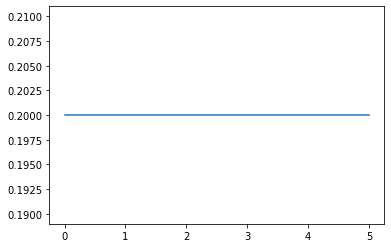

In [13]:
##Now let's see how to do this automatically with scipy.


# Import the following
from scipy.stats import uniform
import numpy as np

#Let's set an A and B
A=0
B=5

# Set x as 100 linearly spaced points between A and B
x = np.linspace(A,B,100)

# Use uniform(loc=start point,scale=endpoint)
rv = uniform(loc=A,scale=B)

#Plot the Probability Density Function (PDF) of that uniform distirbution
plt.plot(x,rv.pdf(x))


Note the above line is at 0.2, as we would expect since 1/(5-0) is 1/5 or 0.2.

That's it for Uniform Continuous Distributions. Here are some more resource for you:
1.)http://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29

2.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

3.)http://mathworld.wolfram.com/UniformDistribution.html

**Binomial Distribution** is a specific type of a discrete probability distribution.
Let's see an example question first, and then learn about the binomial distribution.

**Example 1: Two players are playing basketball, player A and player B. Player A takes an average of 11 shots per game, and has an average success rate of 72%. Player B takes an average of 15 shots per game, but has an average success rate of 48%.**

Question 1: What's the probability that Player A makes 6 shots in an average game?

Question 2: What's the probability that Player B makes 6 shots in an average game?

We can classify this as a binomial experiment if the following conditions are met:

1.) The process consists of a sequence of n trials.

2.) Only two exclusive outcomes are possible for each trial (A success and a failure) e.g fliiping a coin

3.) If the probability of a success is 'p' then the probability of failure is q=1-p

4.) The trials are independent. eg your first coin flip cannot affect the 100th coin flip

The formula for a Binomial Distribution Probability Mass Function turns out to be:
    
    Pr(X=k)=C(n,k)p**k(1-p)**n-k

Where:

    *n= number of trials,

    *k=number of successes,

    *p=probability of success,

    *1-p=probability of failure (often written as q=1-p).

This means that to get exactly 'k' successes in 'n' trials, we want exactly 'k' successes:

       p**k
       
and we want 'n-k' failures:

       (1-p)**n-k
       
Then finally, there are

       C(n,k)
       
ways of putting 'k' successes in 'n' trials. So we multiply all these together to get the probability of exactly that many success and failures in those n trials!

Quick note, C(n,k) refers to the number of possible combinations of N things taken k at a time.

This is also equal to:
 
        C(n,k)=n!/k!(n-k)
**So let's try out the example problem!**

In [22]:
# Set up player A

# Probability of success for A
player_A = .72
# Number of shots for A
n_A = 11

# Make 6 shots
k = 6

# Now import scipy for combination
import scipy.misc as sc
from scipy.misc import comb

# Set up C(n,k)
comb_A = sc.comb(n_A,k)

# Now put it together to get the probability!
answer_A = comb_A * (player_A**k) * ((1-player_A)**(n_A-k))

# Put the answer in percentage form!
answer_A = 100*answer_A


# Quickly repeat all steps for Player B
p_B = .48
n_B = 15
comb_B = sc.comb(n_B,k)
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))


#Print Answers
print(' The probability of player A making 6 shots in an average game is %1.1f%% ' %answer_A)
print( ' \n')
print( ' The probability of player B making 6 shots in an average game is %1.1f%% ' %answer_B)


ImportError: cannot import name 'comb' from 'scipy.misc' (/Users/bad_billipino/opt/anaconda3/lib/python3.9/site-packages/scipy/misc/__init__.py)

So now we know that even though player B is technically a worse shooter, because she takes more shots she will have a higher chance of making 6 shots in an average game!

But wait a minute... what about a higher amount of shots, will player's A higher probability take a stronger effect then? What's the probability of making 9 shots a game for either player?

In [ ]:
#Let's find out!

#Set number of shots
k = 9

#Set new combinations
comb_A = sc.comb(n_A,k)
comb_B = sc.comb(n_B,k)

# Everything else remains the same
answer_A = 100 * comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

#Print Answers
print(' \n')
print( ' The probability of player A making 9 shots in an average game is %1.1f%% ' %answer_A)
print( '\n')
print(' The probability of player B making 9 shots in an average game is %1.1f%% ' %answer_B)
print( '\n')

Now we see that player's A ability level gives better odds of making exactly 9 shots. We need to keep in mind that we are asking about the probability of making exactly those amount of shots. This is a different question than " What's the probability that player A makes at least 9 shots?".



### Now let's investigate the mean and standard deviation for the binomial distribution
The mean of a binomial distribution is simply:

    mean = n*p

This intuitively makes sense, the average number of successes should be the total trials multiplied by your average success rate.

Similarly we can see that the standard deviation of a binomial is:

    standard deviation = math.sqrt(n*q*p)
So now we can ask, whats the average number of shots each player will make in a game +/- a standard distribution?

In [21]:
# Let's go ahead and plug in to the formulas.

# Get the mean
mu_A = n_A *player_A
mu_B = n_B *p_B

#Get the standard deviation
sigma_A = ( n_A *player_A*(1-player_A) )**0.5
sigma_B = ( n_B *p_B*(1-p_B) )**0.5

# Now print results
print('\n')
print('Player A will make an average of %1.0f +/- %1.0f shots per game' %(mu_A,sigma_A))
print( '\n')
print('Player B will make an average of %1.0f +/- %1.0f shots per game' %(mu_B,sigma_B))
print('\n')
print( "NOTE: It's impossible to make a decimal of a shot so '%1.0f' was used to replace the float!")



NameError: name 'n_B' is not defined

In [20]:
##Let's see how to automatically make a binomial distribution.

from scipy.stats import binom

# We can get stats: Mean('m'), variance('v'), skew('s'), and/or kurtosis('k')
mean,var= binom.stats(n_A,player_A)

print(mean)
print(var**0.5)

7.92
1.4891608375189027


Looks like it matches up with our manual methods. Note: we did not round in this case.

We can also get the probability mass function:
Let's try another example to see the full PMF (Probability Mass Function) and plotting it.

Imagine you flip a fair coin. Your probability of getting a heads is p=0.5 (success in this example).

So what does your probability mass function look like for 10 coin flips?

In [ ]:
import numpy as np

# Set up a new example, let's say n= 10 coin flips and p=0.5 for a fair coin.
n=10
p=0.5

# Set up n success, remember indexing starts at 0, so use n+1
x = range(n+1)

# Now create the probability mass function
Y = binom.pmf(x,n,p)

#Show
Y

# Next we'll visualize the pmf by plotting it.


In [ ]:
##Finally, let's plot the binomial distribution to get the full picture.

import matplotlib.pyplot as plt

# For simple plots, matplotlib is fine, seaborn is unnecessary.

# Now simply use plot
plt.plot(x,Y,'o')

#Title (use y=1.08 to raise the long title a little more above the plot)
plt.title('Binomial Distribution PMF: 10 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)

#Axis Titles
plt.xlabel('Number of Heads')
plt.ylabel('Probability')


That's it for the review on Binomial Distributions. More info can be found at the following sources:

1.) http://en.wikipedia.org/wiki/Binomial_distribution

2.) http://stattrek.com/probability-distributions/binomial.aspx

3.) http://mathworld.wolfram.com/BinomialDistribution.html

Thanks!

### Let's learn about the Poisson Distribution!
Note: I suggest you learn about the binomial distribution first.

A poisson distribution focuses on the number of discrete events or occurrences over a specified interval or continuum (e.g. time,length,distance,etc.). We'll look at the formal definition, get a break down of what that actually means, see an example and then look at the other characteristics such as mean and standard deviation.

Formal Definition: A discrete random variable X has a Poisson distribution with parameter λ if for k=0,1,2.., the probability mass function of X is given by:

    Pr(X=k)= (λ**ke**-λ)/k!

 
where e is Euler's number (e=2.718...) and k! is the factorial of k.

The Poisson Distribution has the following characteristics:

1.) Discrete outcomes (x=0,1,2,3...)

2.) The number of occurrences can range from zero to infinity (theoretically). 

3.) It describes the distribution of infrequent (rare) events.

4.) Each event is independent of the other events.

5.) Describes discrete events over an interval such as a time or distance.

6.) The expected number of occurrences E(X) are assumed to be constant throughout the experiment.

So what would an example question look like?

Let's say a McDonald's has a lunch rush from 12:30pm to 1:00pm. From looking at customer sales from previous days, we know that on average 10 customers enter during 12:30pm to 1:00pm. What is the probability that exactly 7 customers enter during lunch rush? What is the probability that more than 10 customers arrive?

Let's begin by thinking about how many customers we expect to come into McDonald's during lunch rush. Well we were actually already given that information, it's 10. This means that the mean is 10, then our expected value E(X)=10. In the Poisson distribution this is λ. So the mean = λ for a Poisson Distribution, it is the expected number of occurences over the specfied interval.

So since we now know what λ is, we can plug the information into the probability mass function and get an answer, let's use python and see how this works. Let's start off by answering the first question:

What is the probability that exactly 7 customers enter during lunch rush?

In [23]:
# Note do not use lambda as an object name in python! It is already used for special lambda functions in Python!!

# Set lambda (λ)ie mean
lamb = 10

# Set k to the number of occurences
k=7

#Set up e and factorial math statements
from math import exp
from math import factorial
from __future__ import division

# Now put the probability mass function
prob = (lamb**k)*exp(-lamb)/factorial(k)

# Put into percentage form and print answer
print(' There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*prob))


 There is a 9.01 % chance that exactly 7 customers show up at the lunch rush


Now that we've seen how to create the PMF manually, let's see how to do it automatically with scipy.

In [28]:
# Import the dsitrubtion from scipy.stats
from scipy.stats import poisson

# Set our mean = 10 customers for the lunch rush
mu = 10

# Then we can get the mean and variance
mean,var = poisson.stats(mu)

# We can also calculate the PMF at specific points, such as the odds of exactly 7 customers
odds_seven = poisson.pmf(7,mu)

#Print
print('There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*odds_seven))

# Print the mean
print('The mean is %2.2f ' %mean)


There is a 9.01 % chance that exactly 7 customers show up at the lunch rush
The mean is 10.00 


Awesome! Our manual results match up with scipy's built in stats distribution generator!

Now what if we wanted to see the entire distribution? We'll need this information to answer the second question.

In [29]:

# Now let's get the PMF and plot it

# First the PMF
import numpy as np

# Let's see the PMF for all the way to 30 customers, remeber theoretically an infinite number of customers could show up.
k=np.arange(30)

# Average of 10 customers for the time interval
lamb = 10

#The PMF we'll use to plot
pmf_pois = poisson.pmf(k,lamb)


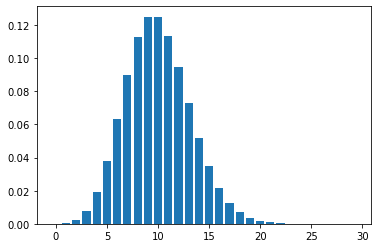

In [31]:

# We can now plot it simply by
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Simply call a barplot
plt.bar(k,pmf_pois);

For the question: What is the probability that more than 10 customers arrive? We need to sum up the value of every bar past 10 the 10 customers bar.

We can do this by using a Cumulative Distribution Function (CDF). This describes the probability that a random variable X with a given probability distribution (such as the Poisson in this current case) will be found to have a value less than or equal to X.

What this means is if we use the CDF to calcualte the probability of 10 or less customers showing up we can take that probability and subtract it from the total probability space, which is just 1 (the sum of all the probabilities for every number of customers).

In [32]:
# scipy has a built in cdf we can use

# Set out k = 10 for ten customers, set mean = 10 for the average of ten customers during lunch rush.
k,mu = 10,10

# The probability that 10 or less customers show up is:
prob_up_to_ten = poisson.cdf(k,mu)

#print
print('The probability that 10 or less customers show up is %2.1f %%.' %(100*prob_up_to_ten))


     

The probability that 10 or less customers show up is 58.3 %.


Now we can answer the question for more than 10 customers. It will be the remaining probability space

In [33]:
# Sorry for the long object names, but hopefully this makes the thought process very clear
prob_more_than_ten = 1 - prob_up_to_ten

print('The probability that more than ten customers show up during lunch rush is %2.1f %%.' %(100*prob_more_than_ten))


The probability that more than ten customers show up during lunch rush is 41.7 %.


That's it for the basics of the poisson distribution! More free info can be found at these sources:

1.)http://en.wikipedia.org/wiki/Poisson_distribution#Definition

2.)http://stattrek.com/probability-distributions/poisson.aspx

3.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html



### Let's learn the normal distribution! Note: You should check out the binomial distribution first.
We'll start with the definition of the PDF, we'll see how to create the distribution in python using scipy and numpy, and discuss some properties of the normal distribution.

The distribution is defined by the probability density function equation:

     f(x,μ,σ) = 1/σ math.sqrt(2π)**e**(-1/2z**2)
 
Where:
 
     z=(X-μ)/σ

where: μ=mean , σ=standard deviation , π=3.14... , e=2.718... The total area bounded by curve of the probability density function equation and the X axis is 1; thus the area under the curve between two ordinates X=a and X=b, where a

Let's look at the curve. The normal distribution has several characteristics:

1.) It has a lower tail (on the left) and an upper tail (on the right)

2.) The curve is symmetric (for the theoretical distribution)

3.) The peak occurs at the mean.

4.) The standard deviation gives the curve a different shape:
    -Narrow and tall for a smaller standard deviation.
    -Shallower and fatter for a larger standard deviation.
    
5.) The area under the curve is equal to 1 (the total probaility space)

6.) The mean=median=mode.

For the normal distribution, we can see what percentage of values lie between +/- a standard deviation. 68% of the values lie within 1 TSD, 95% between 2 STDs, and 99.7% between 3 STDs. The number of standard deviations is also called the z-score, which we saw above in the PDF.

In [34]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')


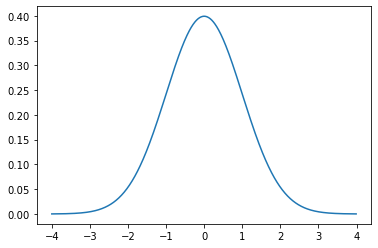

In [35]:
##Now let's learn how to use scipy to create a normal distribution


#Import
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Import the stats library
from scipy import stats

# Set the mean
mean = 0

#Set the standard deviation
std = 1


# Create a range
X = np.arange(-4,4,0.01)

#Create the normal distribution for the range
Y = stats.norm.pdf(X,mean,std)

#
plt.plot(X,Y)


In [36]:
##Now let's learn how to use numpy to create the normal distribution.


import numpy as np

#Set the mean and the standard deviaiton
mu,sigma = 0,0.1

# Now grab 1000 random numbers from the normal distribution
norm_set = np.random.normal(mu,sigma,1000)


     

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  6.,  8.,  8., 11.,
        18., 22., 27., 34., 40., 50., 48., 54., 71., 68., 66., 77., 67.,
        64., 51., 37., 37., 41., 19., 18., 15.,  8.,  7.,  5.,  8.,  3.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.39236677, -0.37534691, -0.35832706, -0.3413072 , -0.32428735,
        -0.30726749, -0.29024763, -0.27322778, -0.25620792, -0.23918807,
        -0.22216821, -0.20514836, -0.1881285 , -0.17110865, -0.15408879,
        -0.13706893, -0.12004908, -0.10302922, -0.08600937, -0.06898951,
        -0.05196966, -0.0349498 , -0.01792995, -0.00091009,  0.01610977,
         0.03312962,  0.05014948,  0.06716933,  0.08418919,  0.10120904,
         0.1182289 ,  0.13524875,  0.15226861,  0.16928847,  0.18630832,
         0.20332818,  0.22034803,  0.23736789,  0.25438774,  0.2714076 ,
         0.28842745,  0.30544731,  0.32246717,  0.33948702,  0.35650688,
         0.37352673,  0.39054659,  0.40756644,  0.4245863 ,

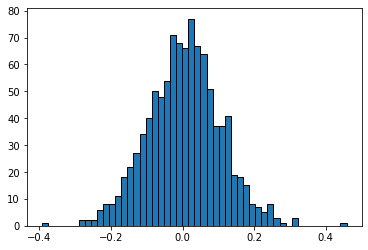

In [38]:

#Now let's plot it using seaborn

import seaborn as sns

plt.hist(norm_set,bins=50, edgecolor='black')


There's a ton on information to go over for the normal distribution, this notebook should just serve as a very mild introduction, for more info check out the following sources:

1.) http://en.wikipedia.org/wiki/Normal_distribution

2.) http://mathworld.wolfram.com/NormalDistribution.html

3.) http://stattrek.com/probability-distributions/normal.aspx

Thanks!

### Let's learn about sampling theory!

Sampling Theory is a study of relationships exisiting between a population and the samples drawn from the population. For instance, the population may be the entire population of the United States, while the sample may be 1000 people you polled for a survey.

There are a ton of important questions we want to ask pertaining to sampling theory, such as whether the observed difference between two samples are due to chance variation or if they are statistically significant. These are sometimes known as tests of significance. We'll talk about them later in another iPython notebook.

Random Samples and Numbers
Samples must be chosen so that they are representative of a population. One method of doing this is by selecting using random sampling. This methods means that every member of the population has an euqal chance of being selected. There's lots of ways to create a "random" sampling method, it can be as simple as picking names from a hat, or using pseudorandom number generators such as a Mersenne Twister (the default PRNG for python).

Learn more about it at: https://docs.python.org/2/library/random.html

Sampling with and without Replacement
Drawing samples without replacement from a finite source of samples is considered a finite sampling. Drawing samples from a finite source with replacement can be considered infinite. Such as tossing a coin N number of times, while there are only two possibile outcomes, there is an infinite possibility of any series of heads or tails as N goes to infinity.

Sampling Distribution of Means
If you draw N samples from a finite population of Np samples where Np>N then the mean and the std are denoted as the following:

The mean:

        μx = μ

The standard deviation:
 
         σx = σ/math.sqrt(N)math.sqrt(Np - N)/math.sqrt(Np - N)
 

This means that we can relate our mean and std from out sample to the total sample population.

Sampling Distribution of Proportions
If the population is infinite and the probability of succes is denoted as p and probability of failure is q=1-p (just like in a binomial distirbution, like a coin flip). The sampling distribution of proportions then has a mean and standard deviation notes as the following:

The mean:

         μp = p

The standard deviation:

        σp = math.sqrt(pq)/math.sqrt(N) = math.sqrt(p(1-p)/N)
 


Sampling Distribution of Differences and Sums
If you are given two sample populations N1 and N2 both of which are normally distributed, we can obtain the mean and standard deviation of the sampling distribution of diffrences or sums of the statistics. If S1 is a statistics of N1 and S2 a statistic of N2 we can obtain the mean and standard deviation as follows:

For the differences of the statistics :

The mean is:

        μs1- s2 = μs1 - μs2
The standard deviation is:

        σs1-s2 = math.sqrt(σ**2s1 + σ**2s2)
For the sum of the statistics :

The mean is:

        μs1- s2 = μs1 + μs2
The standard deviation is:

        σs1-s2 = math.sqrt(σ**2s1 + σ**2s2)


Notice that the standard deviations are summed for both cases, but the means are not!

This is just a quick intro to the topic of sampling theory, check out more here:

1.) http://en.wikipedia.org/wiki/Sampling_distribution

### Let's learn the T-distribution! Note: Learn about the normal distribution first!
For previous distributions the sample size was assumed large (N>30). For sample sizes that are less than 30, otherwise (N<30). Note: Sometimes the t-distribution is known as the student distribution.

The t-distribution allows for use of small samples, but does so by sacrificing certainty with a margin-of-error trade-off. The t-distribution takes into account the sample size using n-1 degrees of freedom, which means there is a different t-distribution for every different sample size. If we see the t-distribution against a normal distribution, you'll notice the tail ends increase as the peak get 'squished' down.

It's important to note, that as n gets larger, the t-distribution converges into a normal distribution.

To further explain degrees of freedom and how it relates tothe t-distribution, you can think of degrees of freedom as an adjustment to the sample size, such as (n-1). This is connected to the idea that we are estimating something of a larger population, in practice it gives a slightly larger margin of error in the estimate.

Let's define a new variable called t, where :
 
 
which is analogous to the z statistic given by
 
 

The sampling distribution for t can be obtained:

 
 
 
 
 
Where the gamma function is:

And v is the number of degrees of freedom, typically equal to N-1.

Similar to a z-score table used with a normal distribution, a t-distribution uses a t-table. Knowing the degrees of freedom and the desired cumulative probability (e.g. P(T >= t) ) we can find the value of t. Here is an example of a lookup table for a t-distribution:

http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

Now let's see how to get the t-distribution in Python using scipy!

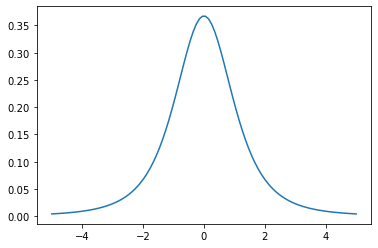

In [39]:
#Import for plots
import matplotlib.pyplot as plt
%matplotlib inline

#Import the stats library
from scipy.stats import t

#import numpy
import numpy as np

# Create x range
x = np.linspace(-5,5,100)

# Create the t distribution with scipy
rv = t(3)

# Plot the PDF versus the x range
plt.plot(x, rv.pdf(x))



Additional resources can be found here:

1.) http://en.wikipedia.org/wiki/Student%27s_t-distribution

2.) http://mathworld.wolfram.com/Studentst-Distribution.html

3.) http://stattrek.com/probability-distributions/t-distribution.aspx

Hypothesis Testing
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true.

Hypothesis Testing can be broken into 10 basic steps.

1.) Data Testing

2.) Assumptions

3.) Hypothesis

4.) Test Statistic

5.) Distribution of Test Statistic

6.) Decision Rule

7.) Calculation of Test Statistic

8.) Statistical Decision

9.) Conclusion

10.) p-values

It is important to note that the initial steps can be done in different orders or at the same time, specifically, I would suggest you come up with you research question first, before going out to do data testing. Moving along:

Let's now break down these steps:

**Step 1: Data Testing**
This one is pretty simple, to do any sort of statistical testing, we'll need some data from a population.

**Step 2: Assumptions**
We will need to make some assumptions regarding our data, such as assuming the data is normally distributed, or what the Standard Deviation of the data is. Another example would be whether to use a T-Distribution or a Normal Distribution.

**Step 3: Hypothesis**
In our Hypothesis Testing, we will have two Hypothesis: The Null Hypothesis (denoted as Ho) and the Alternative Hypothesis (denoted as HA). The Null Hypothesis is the hypothesis we are looking to test against the alternative hypothesis. Let's get an example of what this looks like:

Let's assume we have a data set regarding ages of customers to a restaurant. Let's say for this particular data set we want to try to prove that the mean of that sample population is not 30. So we set our null hypothesis as:

        Ho: μ = 30
        
And our Alternative Hypothesis as:

        Ho: μ != 30
        
We could have also set out Alternative Hypothesis to be that the mean is greater than 30 or another Alternative Hypothesis we could have proposed is the mean is less than 30. We will discuss these other options later when we go into one-tail versus two-tail tests.

Continuing on with our steps:

**Step 4: Test Statistic**
Based on our assumptions, we'll choose a suitable test statistic. For example, if we believe to have a normal distribution with our data we would choose a z-score as our standard error:

        z = (x - μo)/σ\math.sqrt(n)
        
Or if we assume to have a t-distribution we would choose a t-score (estimated standard error):

         t = (x - μo)/s\math.sqrt(n)
 
Then our test statistic is defined as:

        Test Statistic = (Relevant statistic - Hypothesized         
        Paraemeter)/ Standard Error of Relevant Statistic

**Step 5: Distribution of Test Statistic**
As discussed earlier, verify that whether your data should use a t or z distribution.

**Step 6: Decision Rule**
Considering the distribution, we need to establish a significance level, usually denoted as alpha, α. Alpha is the probability of having a Null Hypothesis that is true, but our data shows is wrong. So alpha is the probability of rejecting a true Null Hypothesis. By convention, alpha is usually equal to 0.05 or 5%. This means that 5% of the time, we will falsely reject a true null hypothesis, this is best explained through a picture.

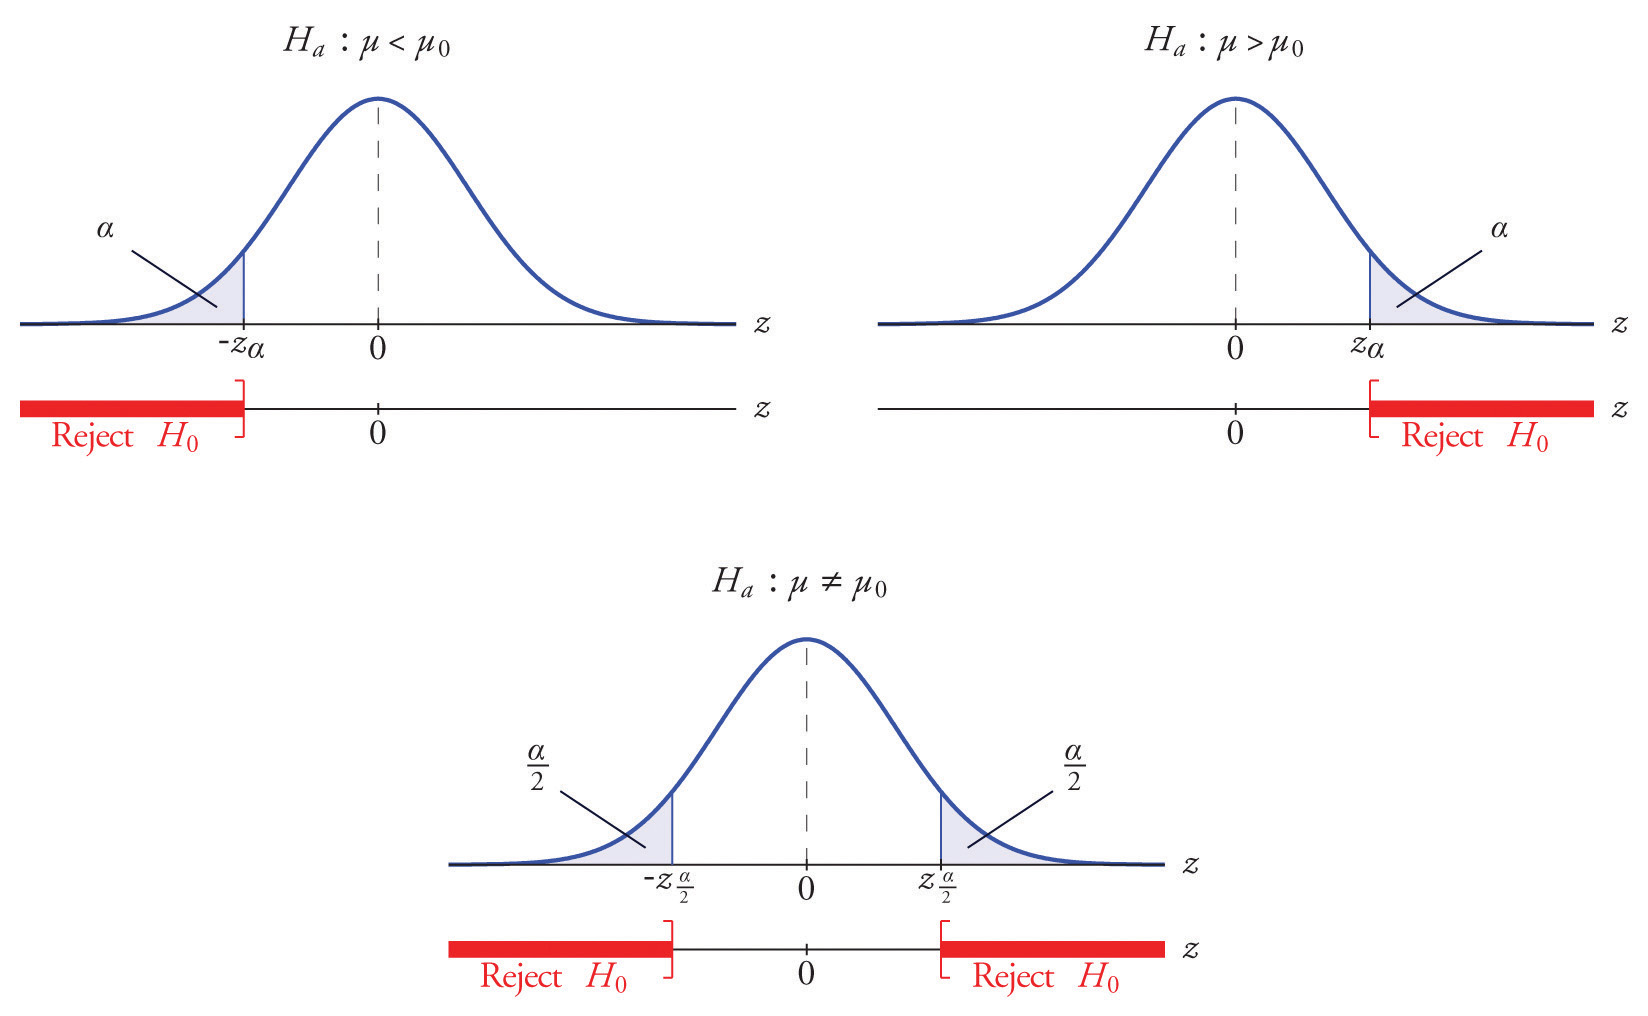

In [40]:
from IPython.display import Image
url = 'http://images.flatworldknowledge.com/shafer/shafer-fig08_004.jpg'
Image(url,height=400,width=600)


The above image shows three types of tests. It shows 2 types of One-Tail Tests on top, and a Two-Tail Test on the bottom. You apply your significance level to a region depending on your Alternative Hypothesis (shown above each distribution).

Let's look at the bottom two-tail test. With an alpha=0.05, then whenever we take a sample and get our test statistic (the t or z score) then we check where it falls in our distribution. If the Null Hypothesis is True, then 95% of the time it would land inbetween the α/2 markers. So if our test statistic lands inbetween the alpha markers (for a two tail test inbetween α/2, for a one tail test either below or above the α marker depending on the Alternative Hypothesis) we accept (or don't reject) the Null Hypothesis. If it landsoutside of this zone, we reject the Hypothesis.

Now let's say we actually made a mistake, and rejected a Null Hypothesis that unknown to us was True, then we made what is called a Type I error. If we accepted a Null Hypothesis that was actually False, we've made a Type II error. Below is a handy chart depicting the error types.

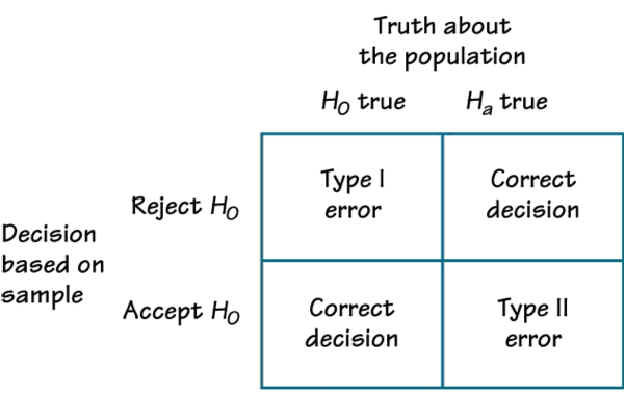

In [41]:
url='http://www.personal.ceu.hu/students/08/Olga_Etchevskaia/images/errors.jpg'
Image(url,height=200,width=300)


**Step 7: Calculate the Test Statistic**
Now that we understand our decision rule we can calculate our t or z score.

**Step 8: Statistical Decision**
We take what we understand from Step 6 and see where our test statistic from Step 7 lies.

**Step 9: Conclusion**
We check our statistical decision and conclude whether or not to reject the Null Hypothesis.

**Step 10: Calculate a p-value**
The P value is the estimated probability of rejecting the null hypothesis of a study question when that null hypothesis is actually true. In other words, the P-value may be considered the probability of finding the observed, or more extreme, results when the null hypothesis is true – the definition of ‘extreme’ depends on how the hypothesis is being tested.

It is very important to note: Since the p-value is used in Frequentist inference (and not Bayesian inference), it does not in itself support reasoning about the probabilities of hypotheses, but only as a tool for deciding whether to reject the null hypothesis in favor of the alternative hypothesis.

Let's now go over an example to go through all the steps!